In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread("perro.jpg", cv2.IMREAD_GRAYSCALE)
img

array([[127, 127, 127, ...,  45,  42,  40],
       [127, 127, 127, ...,  48,  44,  42],
       [127, 127, 127, ...,  51,  48,  45],
       ...,
       [134, 141, 145, ..., 116, 107,  96],
       [168, 161, 156, ..., 105, 100,  97],
       [192, 175, 164, ...,  97,  98,  98]], dtype=uint8)

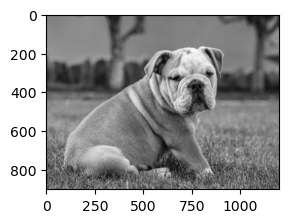

In [3]:
plt.figure(figsize=(3, 3))
plt.imshow(img, cmap="gray")
plt.show()

## Problema 1

In [4]:
def binarizar_imagen(ruta_imagen):
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    _, imagen_bi = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)
    return imagen_bi

In [5]:
ubicacion = "perro.jpg"
imagen_bi = binarizar_imagen(ubicacion)

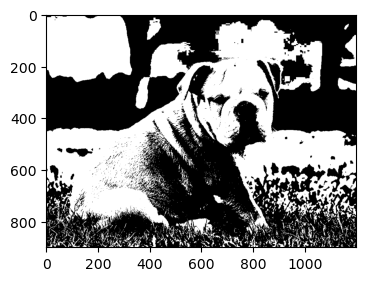

In [6]:
plt.figure(figsize=(4, 4))
plt.imshow(imagen_bi, cmap="gray")
plt.show()

## Problema 2

In [7]:
ubicacion2 = "perro2.jpg"
imagen_bi2 = binarizar_imagen(ubicacion2)

In [8]:
def operaciones_img (operacion1, operacion2):
    suma = cv2.add(operacion1, operacion2)
    resta = cv2.subtract(operacion1, operacion2)
    and_lo = cv2.bitwise_and(operacion1, operacion2)
    or_lo = cv2.bitwise_or(operacion1, operacion2)
    xor_lo = cv2.bitwise_xor(operacion1, operacion2)
    resultados = {
        'suma': suma,
        'resta': resta,
        'and': and_lo,
        'or': or_lo,
        'xor': xor_lo
    }
    return resultados

In [9]:
resultados = operaciones_img(imagen_bi, imagen_bi2)

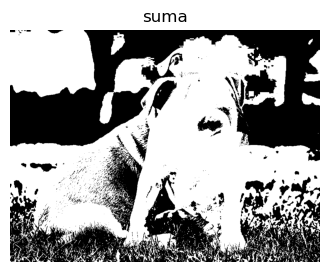

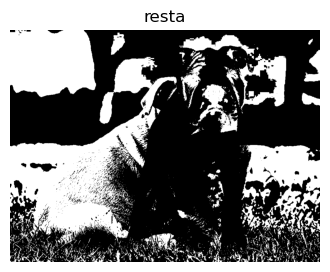

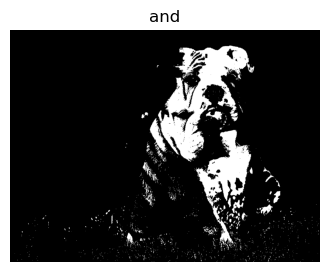

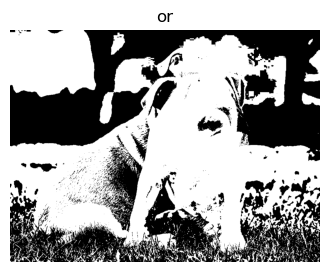

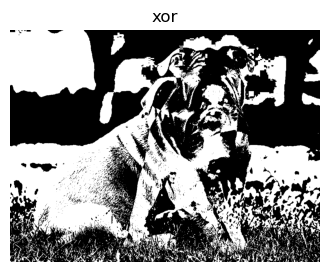

In [10]:
for nombre, imagen in resultados.items():
    plt.figure(figsize=(4, 4))
    plt.imshow(imagen, cmap="gray")
    plt.title(nombre)
    plt.axis('off')
    plt.show()

## Problema 3

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
def dimensiones_3d(imagen_3D):
    h, w = imagen_3D.shape
    X, Y = np.meshgrid(np.arange(w), np.arange(h))
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, imagen_3D, cmap='gray', edgecolor='none')
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Intensidad de Gris')
    plt.show()

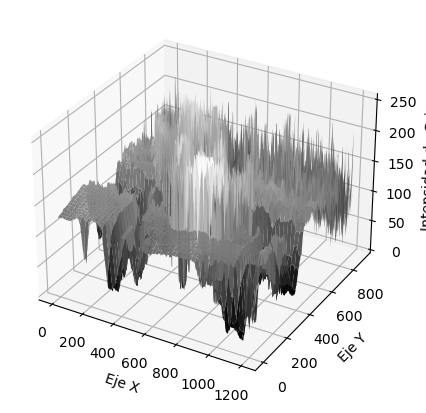

In [13]:
dimensiones_3d(img)

## Problema 4

In [40]:
def transformacion_img (ima_trans):
    imagen_normalizada = ima_trans / 255.0
    imagen_negativa = 255 - ima_trans

    alpha = 1.5  
    beta = 20  
    imagen_lineal = cv2.convertScaleAbs(ima_trans, alpha=alpha, beta=beta)

    c_log = 255 / np.log(1 + np.max(ima_trans))
    imagen_logaritmica = c_log * np.log(1 + ima_trans)
    imagen_logaritmica = np.uint8(imagen_logaritmica)

    a_exp = 255  
    gamma = 2.0
    imagen_exponencial = a_exp * np.power(imagen_normalizada, gamma)
    imagen_exponencial = np.uint8(imagen_exponencial)

    resultados2 = {
        'Negativa': imagen_negativa,
        'Lineal': imagen_lineal,
        'Logaritmica': imagen_logaritmica,
        'Exponencial': imagen_exponencial
    }
    return resultados2

In [41]:
transformaciones = transformacion_img(img)

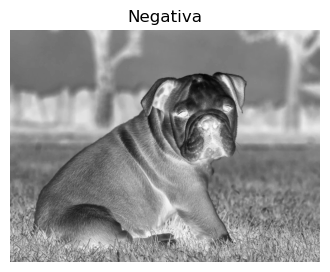

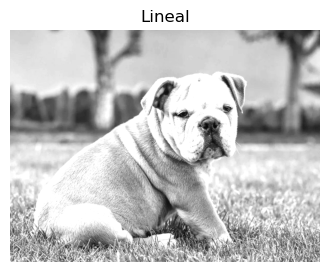

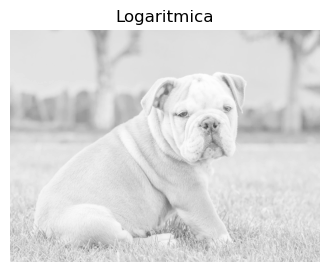

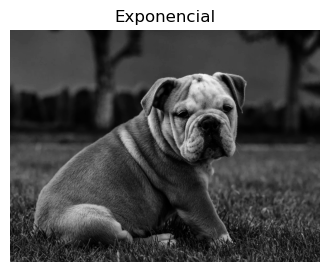

In [42]:
for nomb, im in transformaciones.items():
    plt.figure(figsize=(4, 4))
    plt.imshow(im, cmap='gray')
    plt.title(nomb)
    plt.axis('off')
    plt.show()

## Problema 5

¿Qué es el kernel Laplaceano?

Este filtro es utilizado para realizar detalles finos. Además es un operador utilizado en procesamiento de imágenes y visión por computadora para detectar bordes y resaltar regiones de transición rápida en una imagen. Es un tipo de filtro espacial que calcula la segunda derivada de la intensidad de los píxeles en la imagen, lo que permite identificar cambios bruscos en la intensidad, típicos de los bordes. La formulación del laplaciano puede implementarse en forma digital de varias maneras, la más frecuente en la práctica es aplicar la siguiente máscara:

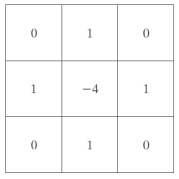

Se puede notar que la suma de los coeficientes de la máscara debe ser cero, lo que es coherente en el caso de que el punto en cuestión y sus vecinos tengan el mismo valor. Los píxeles del borde darán como respuesta un número negativo (o positivo) “grande”. El Laplaciano no se suele usar directamente en la práctica por ser muy sensible al ruido, por lo que es común aplicar un filtro de suavizado (como un filtro gaussiano) antes de usar el operador laplaciano para evitar detecciones falsas.

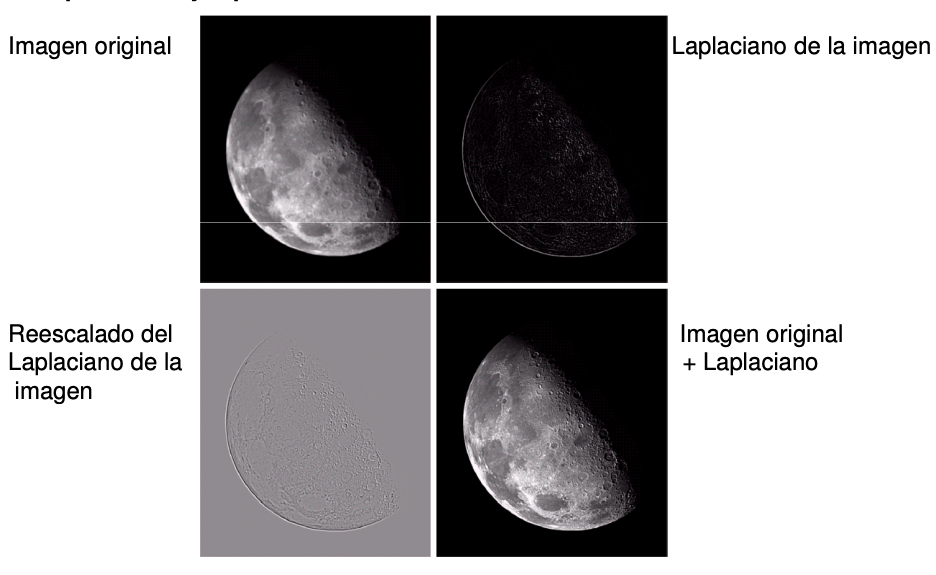

Entre las diferencias de usar este kernel con el algoritmo de Canny se encuentran:
- El kernel laplaceano es un operador de segunda derivada que mide la tasa de cambio de los gradientes de la imagen. Se aplica mediante una convolución con un kernel específico. Mientras que el detector de bordes de Canny es un enfoque más sofisticado y completo que incluye varios pasos: suavizado, cálculo de gradiente, supresión de no-máximos, y umbralización con histéresis.

- El kernel laplaceano produce una imagen donde los bordes son realzados, pero no ofrece información sobre la dirección del borde ni sobre su fuerza relativa. Mientras que el algoritmo de Canny proporciona bordes finos y bien definidos, con menos detecciones de bordes falsos y menos sensibilidad al ruido.

- El kernel laplaceano es muy Sensible al Ruido, debido a que es un operador de segunda derivada, cualquier pequeño cambio en la intensidad de los píxeles puede generar un borde. Mientras que el algoritmo de Canny es menos Sensible al Ruido, el algoritmo de Canny incluye un paso de suavizado gaussiano inicial que reduce significativamente el impacto del ruido antes de calcular los gradientes.

- El kernel laplaceano es una operación rápida y directa, lo que lo hace un método menos costoso en términos de computación. Mientras que el algoritmo de Canny es más complejo y requiere más tiempo de procesamiento.